# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [18]:
tab = pd.crosstab(df['sex'], df['flag_doente'], margins= True)
tab = pd.crosstab(df['sex'].replace({0: 'Mulher', 1: 'Homem'}), df['flag_doente'].replace({0: 'Saudável', 1: 'Doente'}), margins=True)
tab = tab.rename(index={'All': 'Total'}, columns={'All': 'Total'})
tab

flag_doente,Doente,Saudável,Total
sex,,,
Homem,114,92,206
Mulher,25,72,97
Total,139,164,303


In [20]:
tab['Probabilidade'] = tab['Doente']/tab['Total']
tab

flag_doente,Doente,Saudável,Total,probabilidade,Probabilidade
sex,,,,,
Homem,114,92,206,0.553398,0.553398
Mulher,25,72,97,0.257732,0.257732
Total,139,164,303,0.458746,0.458746


In [21]:
tab['Chance Odds'] = tab['Doente']/tab['Saudável']
tab

flag_doente,Doente,Saudável,Total,probabilidade,Probabilidade,Chance Odds
sex,,,,,,
Homem,114,92,206,0.553398,0.553398,1.239130
Mulher,25,72,97,0.257732,0.257732,0.347222
Total,139,164,303,0.458746,0.458746,0.847561


In [23]:
1.239130/0.347222

3.5686966839658782

In [27]:
#odds ratio
tab['RC_vs_total'] = tab['Chance Odds']/tab.loc['Total','Chance Odds']
tab

flag_doente,Doente,Saudável,Total,probabilidade,Probabilidade,Chance Odds,Odds Ratio,RC_vs_Mulher,RC_vs_total
sex,,,,,,,,,
Homem,114,92,206,0.553398,0.553398,1.239130,3.568696,3.568696,1.461996
Mulher,25,72,97,0.257732,0.257732,0.347222,1.000000,1.000000,0.409672
Total,139,164,303,0.458746,0.458746,0.847561,2.440976,2.440976,1.000000


In [29]:
tab['Logito'] = np.log(tab['Chance Odds'])
tab

flag_doente,Doente,Saudável,Total,probabilidade,Probabilidade,Chance Odds,Odds Ratio,RC_vs_Mulher,RC_vs_total,Logito
sex,,,,,,,,,,
Homem,114,92,206,0.553398,0.553398,1.239130,3.568696,3.568696,1.461996,0.214410
Mulher,25,72,97,0.257732,0.257732,0.347222,1.000000,1.000000,0.409672,-1.057790
Total,139,164,303,0.458746,0.458746,0.847561,2.440976,2.440976,1.000000,-0.165392


In [31]:
total_chance_odds = tab.loc['Total', 'Chance Odds']
tab['WOE'] = np.log(tab['Chance Odds']/total_chance_odds)
tab.loc['Total', 'WOE'] = 0
tab

flag_doente,Doente,Saudável,Total,probabilidade,Probabilidade,Chance Odds,Odds Ratio,RC_vs_Mulher,RC_vs_total,Logito,WOE
sex,,,,,,,,,,,
Homem,114,92,206,0.553398,0.553398,1.239130,3.568696,3.568696,1.461996,0.214410,0.379802
Mulher,25,72,97,0.257732,0.257732,0.347222,1.000000,1.000000,0.409672,-1.057790,-0.892398
Total,139,164,303,0.458746,0.458746,0.847561,2.440976,2.440976,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [33]:
tab2 = pd.qcut(df['age'], 5, duplicates='drop')
tab2.value_counts().sort_index()


(28.999, 45.0]    63
(45.0, 53.0]      64
(53.0, 58.0]      71
(58.0, 62.0]      45
(62.0, 77.0]      60
Name: age, dtype: int64

In [40]:
group_reg = df.groupby(tab2)
qualid = group_reg[['age']].count().rename(columns = {'age': 'Contagem'})
qualid

,Contagem
age,
"(28.999, 45.0]",63
"(45.0, 53.0]",64
"(53.0, 58.0]",71
"(58.0, 62.0]",45
"(62.0, 77.0]",60


In [44]:
qualid['Idade_Média'] = group_reg['age'].mean()
qualid

,Contagem,Idade_Média
age,,
"(28.999, 45.0]",63,41.222222
"(45.0, 53.0]",64,50.000000
"(53.0, 58.0]",71,56.211268
"(58.0, 62.0]",45,60.355556
"(62.0, 77.0]",60,66.516667


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

Text(0.5, 0, 'Grupo')

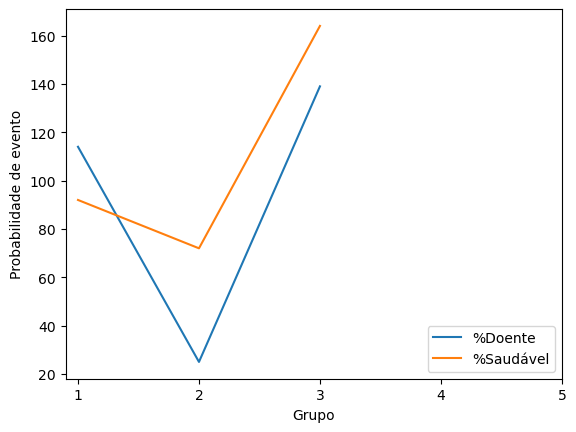

In [45]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = tab['Doente'].plot(label='%Doente')
ax = tab['Saudável'].plot(label='%Saudável')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')